# Movie Review 

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training set

In [5]:
train_dataset = pd.read_csv('/content/drive/MyDrive/Pattern Recognition/Train.csv')
print(train_dataset.shape)
train_dataset.head()

(40000, 2)


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


Validation set

In [6]:
valid_dataset = pd.read_csv('/content/drive/MyDrive/Pattern Recognition/Valid.csv')
print(valid_dataset.shape)
valid_dataset.head()

(5000, 2)


,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


Test set

In [7]:
test_dataset = pd.read_csv('/content/drive/MyDrive/Pattern Recognition/Test.csv')
print(test_dataset.shape)
test_dataset.head()

(5000, 2)


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [8]:
X_train_p = train_dataset.iloc[:, :-1].values
y_train = train_dataset.iloc[:, -1].values

In [9]:
X_valid_p = valid_dataset.iloc[:, :-1].values
y_valid = valid_dataset.iloc[:, -1].values

In [10]:
X_test_p = test_dataset.iloc[:, :-1].values
y_test = test_dataset.iloc[:, -1].values

In [11]:
X_train_df = pd.DataFrame(X_train_p)
X_valid_df = pd.DataFrame(X_valid_p)
X_test_df = pd.DataFrame(X_test_p)

## Cleaning the texts

In [12]:
import re
def remove_html_tags(text):
    """Remove html tags from a string"""
    
    return re.sub('<.*?>', '', str(text))

In [13]:
X_train_rht = X_train_df[0].apply(lambda cw : remove_html_tags(cw))
X_valid_rht = X_valid_df[0].apply(lambda cw : remove_html_tags(cw))
X_test_rht = X_test_df[0].apply(lambda cw : remove_html_tags(cw))

In [14]:
X_train_rd = X_train_rht.str.replace('\d+', '')
X_valid_rd = X_valid_rht.str.replace('\d+', '')
X_test_rd = X_test_rht.str.replace('\d+', '')

In [15]:
X_train_rp = X_train_rd.str.replace('[^\w\s]',' ')
X_valid_rp = X_valid_rd.str.replace('[^\w\s]',' ')
X_test_rp = X_test_rd.str.replace('[^\w\s]',' ')

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
#stop.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
X_train_split = X_train_rp.astype(str).str.lower().str.split()
X_valid_split = X_valid_rp.astype(str).str.lower().str.split()
X_test_split = X_test_rp.astype(str).str.lower().str.split()

In [18]:
X_train_rstp = X_train_split.apply(lambda f: [str(item) for item in f if item not in stop])
X_valid_rstp = X_valid_split.apply(lambda f: [str(item) for item in f if item not in stop])
X_test_rstp = X_test_split.apply(lambda f: [str(item) for item in f if item not in stop])

In [19]:
from nltk.stem.porter import PorterStemmer
def stemmer(text):
    ps= PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text])
    return text

In [20]:
X_train_stm = X_train_rstp.apply(stemmer)
X_valid_stm = X_valid_rstp.apply(stemmer)
X_test_stm = X_test_rstp.apply(stemmer)

## Creating the Bag of Words model

In [ ]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=100)
bow_train = matrix.fit_transform(X_train_stm)
bow_valid = matrix.transform(X_valid_stm)
bow_test = matrix.transform(X_test_stm)

## Training the Naive Bayes model on the Training set for BOW

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import math
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
alpha =[0.0001,0.001,0.01,0.1,1,10,100,1000]

for i  in   tqdm(alpha):
    
    classifier = MultinomialNB(alpha = i)
    classifier.fit(bow_train, y_train)
    y_pred_valid = classifier.predict(bow_valid)
    y_pred_test = classifier.predict(bow_test)
    print()
    
    print ('Accuracy for alpha = {first} on validation: '.format(first=i), accuracy_score(y_valid, y_pred_valid))
    
#     print ('F1 score:', 'Accuracy:', accuracy_score(y_valid, y_pred) , f1_score(y_valid, y_pred))
#     print ('Recall:', recall_score(y_valid, y_pred))
#     print ('Precision:', precision_score(y_valid, y_pred))
#     print ('\n clasification report:\n', classification_report(y_valid, y_pred))
#     print ('\n confussion matrix:\n',confusion_matrix(y_valid, y_pred))


100%|██████████| 8/8 [00:00<00:00, 70.71it/s]


Accuracy for alpha = 0.0001 on validation:  0.7256

Accuracy for alpha = 0.001 on validation:  0.7256

Accuracy for alpha = 0.01 on validation:  0.7256

Accuracy for alpha = 0.1 on validation:  0.7256

Accuracy for alpha = 1 on validation:  0.7256

Accuracy for alpha = 10 on validation:  0.7254

Accuracy for alpha = 100 on validation:  0.7248

Accuracy for alpha = 1000 on validation:  0.72


In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
classifier = MultinomialNB(alpha = 1)
classifier.fit(bow_train, y_train)
y_pred_test = classifier.predict(bow_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_test))
# naive_bow_cm = confusion_matrix(y_test, y_pred)
# naive_bow_acc = accuracy_score(y_test, y_pred)

Accuracy:  0.744


In [ ]:
# from sklearn import metrics
# probas_ = classifier.fit(bow_train, y_train).predict_proba(bow_test)
# # Compute ROC curve and area the curve
# fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])

# roc_auc = metrics.auc(fpr, tpr)
# print ("Area under the ROC curve : %f" % roc_auc)

# # Plot ROC curve
# plt.clf()
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
naive_bow_cm = confusion_matrix(y_test, y_pred_test)
print(naive_bow_cm)

[[1857  638]
 [ 642 1863]]


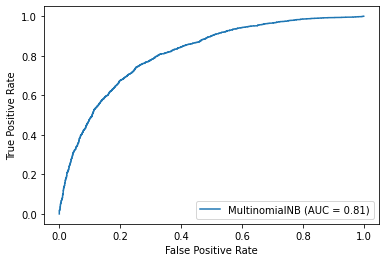

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(classifier, bow_test, y_test)
plt.show() 

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
metrics.auc(fpr, tpr)

0.744000576002304

In [ ]:
recall_score(y_test, y_pred_test, average='macro')

0.7440005760023041

In [ ]:
recall_score(y_test, y_pred_test, average='micro')

0.744

In [ ]:
recall_score(y_test, y_pred_test, average='weighted')

0.744

In [ ]:
f1_score(y_test, y_pred_test, average='macro')

0.7439996313594691

## Training the SVM model on the Training set for BOW

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV


parameters = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
svc = svm.SVC()
grid_bow = GridSearchCV(svc, parameters)
grid_bow.fit(bow_valid, y_valid)
# summarize the results of the grid search
print(grid_bow)
print(grid_bow.best_score_)
print(grid_bow.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7356
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(with_mean=False), SVC(C=10, gamma=0.001, kernel='rbf'))

clf.fit(bow_train, y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
y_pred_bow_scv = clf.predict(bow_test)

In [ ]:
print (accuracy_score(y_test,y_pred_bow_scv ))

0.7506


In [ ]:
svm_rbf_bow_cm = confusion_matrix(y_test, y_pred_bow_scv)
print(svm_rbf_bow_cm)

[[1848  647]
 [ 600 1905]]


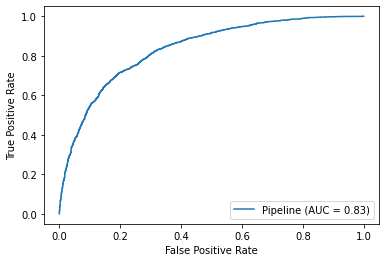

In [ ]:
metrics.plot_roc_curve(clf, bow_test, y_test)
plt.show() 

In [ ]:
fpr_rbf, tpr_rbf, thresholds_rbf = metrics.roc_curve(y_test, y_pred_bow_scv)
metrics.auc(fpr_rbf, tpr_rbf)

0.7505802023208092

In [ ]:
recall_score(y_test, y_pred_bow_scv, average='macro')

0.7505802023208092

In [ ]:
recall_score(y_test, y_pred_bow_scv, average='micro')

0.7506

In [ ]:
recall_score(y_test, y_pred_bow_scv, average='weighted')

0.7506

In [ ]:
f1_score(y_test, y_pred_bow_scv, average='macro')

0.7505675837631858

In [ ]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
svc = svm.SVC(kernel = 'linear')
grid_bow_linear = GridSearchCV(svc, parameters)
grid_bow_linear.fit(bow_valid, y_valid)
# summarize the results of the grid search
print(grid_bow_linear)
print(grid_bow_linear.best_score_)
print(grid_bow_linear.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7368
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
clf_svm_linear = make_pipeline(StandardScaler(with_mean=False), SVC(C=0.1, kernel='linear'))

clf_svm_linear.fit(bow_train, y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('svc',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_pred_bow_scv_linear = clf_svm_linear.predict(bow_test)

In [ ]:
print (accuracy_score(y_test,y_pred_bow_scv_linear ))

0.7512


In [ ]:
svm_lin_bow_cm = confusion_matrix(y_test, y_pred_bow_scv_linear)
print(svm_lin_bow_cm)

[[1859  636]
 [ 608 1897]]


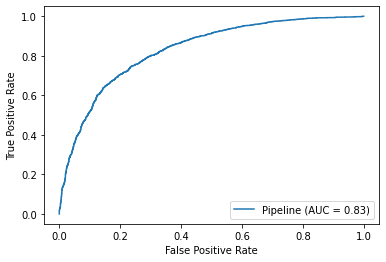

In [ ]:
metrics.plot_roc_curve(clf_svm_linear, bow_test, y_test)
plt.show() 

In [ ]:
fpr_lin, tpr_lin, thresholds_lin = metrics.roc_curve(y_test, y_pred_bow_scv_linear)
metrics.auc(fpr_lin, tpr_lin)

0.751187804751219

In [ ]:
recall_score(y_test, y_pred_bow_scv_linear, average='macro')

0.751187804751219

In [ ]:
recall_score(y_test, y_pred_bow_scv_linear, average='micro')

0.7512

In [ ]:
recall_score(y_test, y_pred_bow_scv_linear, average='weighted')

0.7512

In [ ]:
f1_score(y_test, y_pred_bow_scv, average='macro')

0.7505675837631858

In [21]:
!pip install transformers

     |████████████████████████████████| 1.4MB 7.3MB/s 
     |████████████████████████████████| 890kB 28.9MB/s 
     |████████████████████████████████| 2.9MB 50.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=6b518f9c0f94efa87559dd4ba9a072578b12bdf0b65dd0becec5204c37f5fc0b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [22]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')
def BERT_Embed (reviews):
  features = []
  for i in range(len(reviews)):
    inputs = tokenizer(reviews[i], truncation = True, 
                       padding= 'max_length', max_length= 512 ,return_tensors="tf")
    outputs = model(inputs,output_hidden_states =True)
    hidden_states = outputs[2]
    # second to last hidden layer 
    sent_emb = np.mean(hidden_states[-2][0] , axis= 0)
    features.append(sent_emb)
  return np.stack(features, axis=0)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [23]:
xbert_train = BERT_Embed(X_train_stm)
xbert_valid = BERT_Embed(X_valid_stm)
xbert_test =  BERT_Embed(X_test_stm)

In [38]:
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import math
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
# alpha =[0.0001,0.001,0.01,0.1,1,10,100,1000]
var_smoothing =[1e-12,1e-11,1e-10,1e-09,1e-08,0.001,0.01,0.1,1,10,100,1000]
for i  in   tqdm(var_smoothing):
    
    # bert_classifier = MultinomialNB(alpha = i)
    bert_classifier = GaussianNB(var_smoothing=i)
    bert_classifier.fit(xbert_train, y_train)
    y_bert_pred_valid = bert_classifier.predict(xbert_valid)
    # y_pred_test = classifier.predict(bow_test)
    print()
    
    print ('Accuracy for alpha = {first} on validation: '.format(first=i), accuracy_score(y_valid, y_bert_pred_valid))

  8%|▊         | 1/12 [00:00<00:02,  4.15it/s]


Accuracy for alpha = 1e-12 on validation:  0.6784


 17%|█▋        | 2/12 [00:00<00:02,  4.15it/s]


Accuracy for alpha = 1e-11 on validation:  0.6784


 25%|██▌       | 3/12 [00:00<00:02,  4.14it/s]


Accuracy for alpha = 1e-10 on validation:  0.6784


 33%|███▎      | 4/12 [00:00<00:01,  4.14it/s]


Accuracy for alpha = 1e-09 on validation:  0.6784


 42%|████▏     | 5/12 [00:01<00:01,  4.17it/s]


Accuracy for alpha = 1e-08 on validation:  0.6784


 50%|█████     | 6/12 [00:01<00:01,  4.17it/s]


Accuracy for alpha = 0.001 on validation:  0.6372


 58%|█████▊    | 7/12 [00:01<00:01,  4.15it/s]


Accuracy for alpha = 0.01 on validation:  0.5744


 67%|██████▋   | 8/12 [00:01<00:00,  4.18it/s]


Accuracy for alpha = 0.1 on validation:  0.5398


 75%|███████▌  | 9/12 [00:02<00:00,  4.14it/s]


Accuracy for alpha = 1 on validation:  0.5138


 83%|████████▎ | 10/12 [00:02<00:00,  4.14it/s]


Accuracy for alpha = 10 on validation:  0.5132


 92%|█████████▏| 11/12 [00:02<00:00,  4.12it/s]


Accuracy for alpha = 100 on validation:  0.4972


100%|██████████| 12/12 [00:02<00:00,  4.15it/s]


Accuracy for alpha = 1000 on validation:  0.4972


In [43]:
# var_smoothing= 1e-09 ------> default value
bert_classifier_naive = GaussianNB()
bert_classifier_naive.fit(xbert_train, y_train)
y_bert_pred_test_naive = bert_classifier_naive.predict(xbert_test)
print ('Accuracy: ', accuracy_score(y_test, y_bert_pred_test_naive))
# naive_bow_cm = confusion_matrix(y_test, y_pred)
# naive_bow_acc = accuracy_score(y_test, y_pred)

Accuracy:  0.678


In [44]:
naive_bert_cm = confusion_matrix(y_test, y_bert_pred_test_naive)
print(naive_bert_cm)

[[1791  704]
 [ 906 1599]]


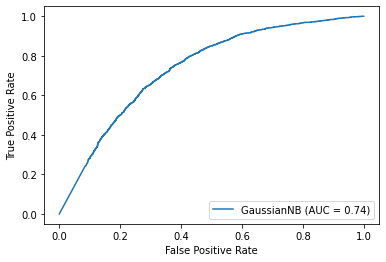

In [45]:
from sklearn import metrics
metrics.plot_roc_curve(bert_classifier_naive, xbert_test, y_test)
plt.show() 

In [46]:
fpr_bert_naive, tpr_bert_naive, thresholds_bert_naive = metrics.roc_curve(y_test, y_bert_pred_test_naive)
metrics.auc(fpr_bert_naive, tpr_bert_naive)

0.6780795123180493

In [47]:
recall_score(y_test, y_bert_pred_test_naive, average='micro')

0.678

In [48]:
f1_score(y_test, y_bert_pred_test_naive, average='micro')

0.678

In [49]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV


parameters = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
svc = svm.SVC()
grid_bert_rbf = GridSearchCV(svc, parameters)
grid_bert_rbf.fit(xbert_valid, y_valid)
# summarize the results of the grid search
print(grid_bert_rbf)
print(grid_bert_rbf.best_score_)
print(grid_bert_rbf.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7844
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(with_mean=False), SVC(C=100, gamma=0.001, kernel='rbf'))

clf.fit(xbert_train, y_train)


NameError: ignored